In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd

import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso


In [23]:

np.random.seed(42)  

start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2022-12-31')

dates = pd.date_range(start_date, end_date)

pm25_values = np.random.rand(365)  # Generate 365 random values
o3_values = np.random.rand(365) 
ws_values = np.random.rand(365)
wd_values = np.random.rand(365)
pm10_values = np.random.rand(365)

df1 = pd.DataFrame({
    'date': dates,
    'pm25': pm25_values,
    'o3':o3_values,
    'ws': ws_values,
    'wd': wd_values,
     'pm10': pm10_values
})

df1['date'] = df1['date'].dt.strftime('%Y-%m-%d')  # Convert date format to 'YYYY-MM-DD'

print(df1)


           date      pm25        o3        ws        wd      pm10
0    2022-01-01  0.374540  0.386103  0.164266  0.176528  0.393864
1    2022-01-02  0.950714  0.961191  0.814575  0.220486  0.651233
2    2022-01-03  0.731994  0.905351  0.665197  0.186438  0.106593
3    2022-01-04  0.598658  0.195791  0.523065  0.779584  0.657845
4    2022-01-05  0.156019  0.069361  0.358830  0.350125  0.999414
..          ...       ...       ...       ...       ...       ...
360  2022-12-27  0.388170  0.841829  0.942732  0.930949  0.205687
361  2022-12-28  0.643288  0.139772  0.649647  0.689527  0.121386
362  2022-12-29  0.458253  0.795267  0.607737  0.676513  0.615013
363  2022-12-30  0.545617  0.201627  0.512689  0.215675  0.774634
364  2022-12-31  0.941465  0.163656  0.230670  0.658885  0.643904

[365 rows x 6 columns]


           date      pm25        o3        ws        wd      pm10   speedo3
0    2022-01-01  0.374540  0.386103  0.164266  0.176528  0.393864  0.164265
1    2022-01-02  0.950714  0.961191  0.814575  0.220486  0.651233  0.814569
2    2022-01-03  0.731994  0.905351  0.665197  0.186438  0.106593  0.665194
3    2022-01-04  0.598658  0.195791  0.523065  0.779584  0.657845  0.523017
4    2022-01-05  0.156019  0.069361  0.358830  0.350125  0.999414  0.358824
..          ...       ...       ...       ...       ...       ...       ...
360  2022-12-27  0.388170  0.841829  0.942732  0.930949  0.205687  0.942607
361  2022-12-28  0.643288  0.139772  0.649647  0.689527  0.121386  0.649600
362  2022-12-29  0.458253  0.795267  0.607737  0.676513  0.615013  0.607694
363  2022-12-30  0.545617  0.201627  0.512689  0.215675  0.774634  0.512685
364  2022-12-31  0.941465  0.163656  0.230670  0.658885  0.643904  0.230655

[365 rows x 7 columns]


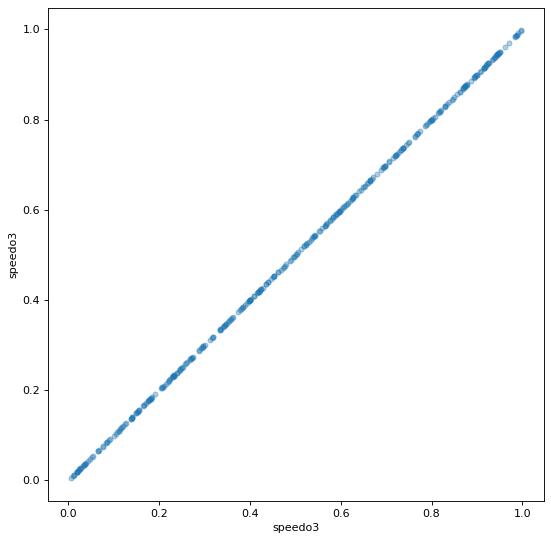

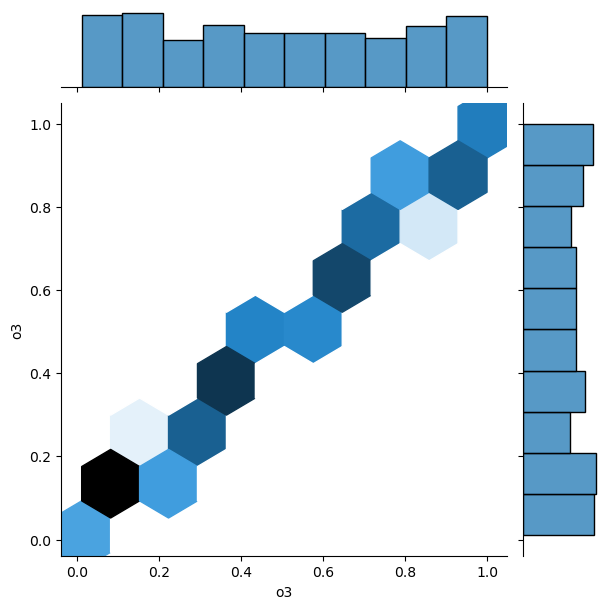

           date      pm25        o3        ws        wd      pm10   speedo3  \
0    2022-01-01  0.374540  0.386103  0.164266  0.176528  0.393864  0.000506   
1    2022-01-02  0.950714  0.961191  0.814575  0.220486  0.651233  0.003135   
2    2022-01-03  0.731994  0.905351  0.665197  0.186438  0.106593  0.002165   
3    2022-01-04  0.598658  0.195791  0.523065  0.779584  0.657845  0.007117   
4    2022-01-05  0.156019  0.069361  0.358830  0.350125  0.999414  0.002193   
..          ...       ...       ...       ...       ...       ...       ...   
360  2022-12-27  0.388170  0.841829  0.942732  0.930949  0.205687  0.015317   
361  2022-12-28  0.643288  0.139772  0.649647  0.689527  0.121386  0.007818   
362  2022-12-29  0.458253  0.795267  0.607737  0.676513  0.615013  0.007176   
363  2022-12-30  0.545617  0.201627  0.512689  0.215675  0.774634  0.001930   
364  2022-12-31  0.941465  0.163656  0.230670  0.658885  0.643904  0.002653   

     speedpm25  
0     0.164265  
1     0.814569  


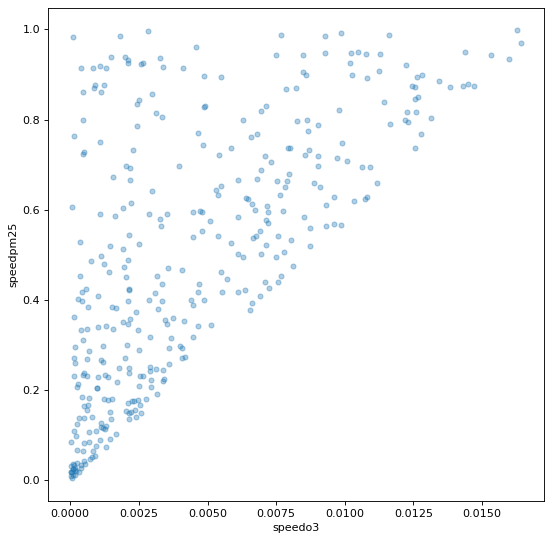

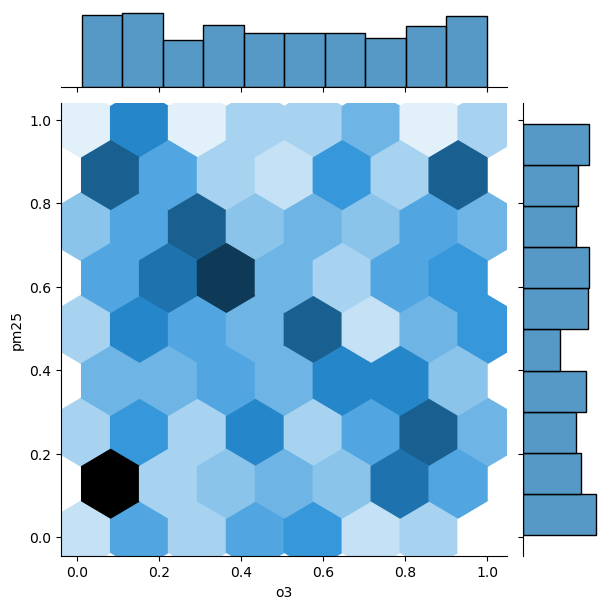

In [24]:

def scatterPlot(df, x, y, **kwargs):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from math import pi

   # df1 = pd.DataFrame({"speed": ws, "direction": wd})
    df["speed"+str(x)] = df['ws'] * np.sin(df['wd'] * pi / 180.0)
    df["speed"+str(y)] = df['ws'] * np.cos(df['wd'] * pi / 180.0)
    print(df)
    fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    #ax.set_aspect("equal")
    _ = df.plot(kind="scatter", x="speed"+str(x), y="speed"+str(y), alpha=0.35, ax=ax)
    plt.show()
    
    sns.jointplot(x=df[x].values, y=df[y].values, kind="hex")
    #print(x,y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    

pollutants=['o3','pm25']

for pollutant in pollutants:
    scatterPlot(df1, 'o3', pollutant)